# Principal Component Analysis: Application

### Speed up ML model training time using PCA

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Load MNIST dataset (70,000 images, each 28x28 = 784 features)
# Note: This took about 15 seconds

X, y = fetch_openml("mnist_784", version=1, return_X_y=True,
                    as_frame=False)

# Convert labels to integers (OpenML returns strings)
y = y.astype(int)

print("Original shape:", X.shape)   # (70000, 784) = (num of images, num of features)

Original shape: (70000, 784)


In [3]:
# 2. Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Lets print 1st image
np.set_printoptions(linewidth=115)
print(X_train[0]) # looks like 5

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26 255  90   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  26   0  13  64 138 180 199  11   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  41 224 232 207 221 253 242 162  17   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 195 253 210 160 161 111  38   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 151 236  50   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  38 247 134   0   0   0   0   0   0   0   0   0   0

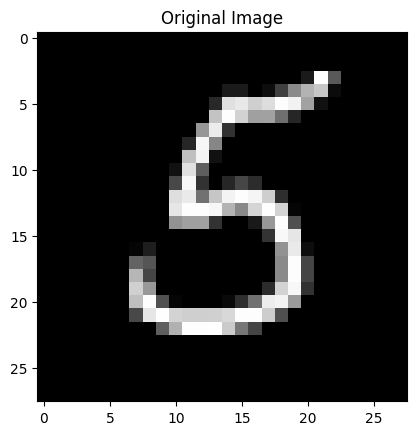

In [13]:
# Show image using matplotlib
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Original Image")
plt.show()

In [4]:
# 3. Scale the data (VERY IMPORTANT for PCA + Logistic Regression)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# lets the scaled data for 1st image
print(X_train_scaled[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.57314838e-03 -5.95681126e-03
 -4.22580900e-03 -4.22580900e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.22580900e-03 -6.44616885e-03 -8.59209495e-03
 -1.09168066e-02 -1.35595611e-02 -1.94103942e-02 -2.44832478e-02 -2.89570151e-02 -3.01599035e-02 -3.23327403e-02
 -3.32657978e-02 -2.90571736e-02 -2.87075583e-02 -2.70164598e-02 -2.27378312e-02 -1.76293290e-02 -1.64452859e-02
 -1.05950576e-02 -7.64365909e-03 -4.22580900e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.22580900e-03 -8.09245399e-03 -1.07130070e-02

In [8]:
# 4. Logistic Regression WITHOUT PCA: Took 24 seconds
import time

model_no_pca = LogisticRegression(
    max_iter=1000,        # increased iterations
    solver='lbfgs', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno
                    # Uses very little memory, good for high-dimensional data
    multi_class='auto'
)

start = time.perf_counter()
model_no_pca.fit(X_train_scaled, y_train)
end = time.perf_counter()

time_diff = end - start
print(f"Training time WITHOUT PCA: {time_diff:.2f} seconds")

#  Accuracy comparison
y_test_predict = model_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_test_predict)
print(f"Accuracy WITHOUT PCA: {acc_no_pca:.4f}")

Training time WITHOUT PCA: 22.22 seconds
Accuracy WITHOUT PCA: 0.9164


In [9]:
# 5. Apply PCA (reduce 784 → 100 dimensions)

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train.shape)
print("After PCA:", X_train_pca.shape)

print("Total variance preserved:", sum(pca.explained_variance_ratio_))

Original shape: (56000, 784)
After PCA: (56000, 100)
Total variance preserved: 0.7042536055038183


In [10]:
# 6. Train a machine learning model on PCA-transformed data
# Logistic Regression works much faster on PCA data because:
# - fewer features to process (100 instead of 784)
# - decision boundary becomes simpler
# - convergence is faster

model_pca = LogisticRegression(
    max_iter=1000,        # increased iterations
    solver='lbfgs',
    multi_class='auto'
)

start = time.perf_counter()
model_pca.fit(X_train_pca, y_train)
end = time.perf_counter()

time_diff = end - start
print(f"Training time WITH PCA: {time_diff:.2f} seconds")

# Evaluate model
y_test_predict = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_test_predict)

print("Accuracy with PCA (100 components):", acc_pca)

Training time WITH PCA: 6.48 seconds
Accuracy with PCA (50 components): 0.916


In [14]:
# percentage saving in time: 70.8 %
(22.22 - 6.48) / 22.22 

0.7083708370837083

# Conclusion: Apply PCA
- With PCA, the ML model training time is faster
- Accuracy is almost same with or without PCA